In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
Data=pd.read_csv("Data-Scientist.csv")
Data

,S.NO,PRGM,STUDENTID,STUDNAME,Physics,Maths,Basic Electrical & Electronics,C Programing,Chemistry,EVS,Basic Electrical Engineering Lab,PhysicsLab,Computational Mathematics,Statistical Inference,C-Programming Lab,Chemistry Lab,MEC101 P,SEM1 GPA,Credits till Sem-1,Mock Test Marks
0,NaN,NaN,NaN,NaN,3,3,4,3,3,0,1,1,4,4,1,1,1,21.00,21,NaN
1,1.0,B.Tech'20,20WU0101001,Kalakoti Varun teja,B-,C+,B-,B+,B-,P,C,A-,C+,B,A-,B,A,2.90,21,13.0
2,2.0,B.Tech'20,20WU0101002,Podduturi Lavaneeth Reddy,C+,C,B,B-,B,P,C,C-,C,B-,B-,B-,D,2.62,21,10.0
3,3.0,B.Tech'20,20WU0101003,Siddhartha Talasila,C,C+,C+,B-,C-,P,A-,D,C+,C+,C+,C+,A-,2.49,21,10.0
4,4.0,B.Tech'20,20WU0101004,Vasireddy Bindu Hasitha,A+,A+,A+,A+,A,P,A+,A+,A+,A,A,A,A-,3.92,21,13.0
5,5.0,B.Tech'20,20WU0101005,Eguturi Manjith Kumar Reddy,A-,A-,A+,A,A,P,A+,B+,A-,A+,A+,A+,D,3.65,21,17.0
6,6.0,B.Tech'20,20WU0101006,Akash Gurrala,B,B+,B,B+,B,P,C+,B,B+,A,A-,A,D,3.05,21,13.0
7,7.0,B.Tech'20,20WU0101007,T Kinshuk Sunder Reddy,D,C-,D,C,D,P,C+,C-,C-,B-,C,B-,C-,1.99,21,16.0
8,8.0,B.Tech'20,20WU0101010,Bharath Reddy,B,B+,B-,B+,B,P,B,A,B+,A-,B+,A-,A+,3.15,21,10.0
9,9.0,B.Tech'20,20WU0101012,Palak Goel,A,A-,B,A-,B+,P,A-,A-,A-,A+,A-,A+,A+,3.46,21,13.0


In [3]:
subjects_to_consider = [
    'Computational Mathematics', 'Statistical Inference', 'C Programing', 'Data Structures and Algorithms',
    'Programming with R/python', 'Data Mining', 'Data Analytics and Visualization', 'Web Scraping', 'Machine learning',
    'Deep learning', 'Information Security', 'Cloud Computing'
]
for subject in subjects_to_consider:
    if subject not in Data.columns:
        Data[subject] = 0

Data

,S.NO,PRGM,STUDENTID,STUDNAME,Physics,Maths,Basic Electrical & Electronics,C Programing,Chemistry,EVS,...,Mock Test Marks,Data Structures and Algorithms,Programming with R/python,Data Mining,Data Analytics and Visualization,Web Scraping,Machine learning,Deep learning,Information Security,Cloud Computing
0,NaN,NaN,NaN,NaN,3,3,4,3,3,0,...,NaN,0,0,0,0,0,0,0,0,0
1,1.0,B.Tech'20,20WU0101001,Kalakoti Varun teja,B-,C+,B-,B+,B-,P,...,13.0,0,0,0,0,0,0,0,0,0
2,2.0,B.Tech'20,20WU0101002,Podduturi Lavaneeth Reddy,C+,C,B,B-,B,P,...,10.0,0,0,0,0,0,0,0,0,0
3,3.0,B.Tech'20,20WU0101003,Siddhartha Talasila,C,C+,C+,B-,C-,P,...,10.0,0,0,0,0,0,0,0,0,0
4,4.0,B.Tech'20,20WU0101004,Vasireddy Bindu Hasitha,A+,A+,A+,A+,A,P,...,13.0,0,0,0,0,0,0,0,0,0
5,5.0,B.Tech'20,20WU0101005,Eguturi Manjith Kumar Reddy,A-,A-,A+,A,A,P,...,17.0,0,0,0,0,0,0,0,0,0
6,6.0,B.Tech'20,20WU0101006,Akash Gurrala,B,B+,B,B+,B,P,...,13.0,0,0,0,0,0,0,0,0,0
7,7.0,B.Tech'20,20WU0101007,T Kinshuk Sunder Reddy,D,C-,D,C,D,P,...,16.0,0,0,0,0,0,0,0,0,0
8,8.0,B.Tech'20,20WU0101010,Bharath Reddy,B,B+,B-,B+,B,P,...,10.0,0,0,0,0,0,0,0,0,0
9,9.0,B.Tech'20,20WU0101012,Palak Goel,A,A-,B,A-,B+,P,...,13.0,0,0,0,0,0,0,0,0,0


In [4]:
NewColumns=['PRGM','STUDENTID','STUDNAME']+ subjects_to_consider
Required_subjects = Data[NewColumns]
Required_subjects

,PRGM,STUDENTID,STUDNAME,Computational Mathematics,Statistical Inference,C Programing,Data Structures and Algorithms,Programming with R/python,Data Mining,Data Analytics and Visualization,Web Scraping,Machine learning,Deep learning,Information Security,Cloud Computing
0,NaN,NaN,NaN,4,4,3,0,0,0,0,0,0,0,0,0
1,B.Tech'20,20WU0101001,Kalakoti Varun teja,C+,B,B+,0,0,0,0,0,0,0,0,0
2,B.Tech'20,20WU0101002,Podduturi Lavaneeth Reddy,C,B-,B-,0,0,0,0,0,0,0,0,0
3,B.Tech'20,20WU0101003,Siddhartha Talasila,C+,C+,B-,0,0,0,0,0,0,0,0,0
4,B.Tech'20,20WU0101004,Vasireddy Bindu Hasitha,A+,A,A+,0,0,0,0,0,0,0,0,0
5,B.Tech'20,20WU0101005,Eguturi Manjith Kumar Reddy,A-,A+,A,0,0,0,0,0,0,0,0,0
6,B.Tech'20,20WU0101006,Akash Gurrala,B+,A,B+,0,0,0,0,0,0,0,0,0
7,B.Tech'20,20WU0101007,T Kinshuk Sunder Reddy,C-,B-,C,0,0,0,0,0,0,0,0,0
8,B.Tech'20,20WU0101010,Bharath Reddy,B+,A-,B+,0,0,0,0,0,0,0,0,0
9,B.Tech'20,20WU0101012,Palak Goel,A-,A+,A-,0,0,0,0,0,0,0,0,0


In [5]:
# Define a function to generate grade-to-numeric mapping
def generate_grade_mapping(grades):
    # Define the mapping of grades to integer values
    grade_mapping = {
        'A+': 10,
        'A': 9,
        'A-': 8,
        'B+': 7,
        'B': 6,
        'B-': 5,
        'C+': 4,
        'C': 3,
        'C-': 2,
        'D': 1
    }

    return grade_mapping

# Define your grading scale
grading_scale = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D']

# Generate the grade-to-numeric mapping based on your grading scale
grade_mapping = generate_grade_mapping(grading_scale)

# Apply the mapping to the subject columns
for subject in subjects_to_consider:
    Required_subjects[subject] = Required_subjects[subject].map(grade_mapping)

# Fill any NaN values in the subject columns with 0
Required_subjects[subjects_to_consider] = Required_subjects[subjects_to_consider].fillna(0)


C:\Users\grvn1\AppData\Local\Temp/ipykernel_40336/245089543.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Required_subjects[subject] = Required_subjects[subject].map(grade_mapping)
C:\Users\grvn1\New folder\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [6]:
Required_subjects

,PRGM,STUDENTID,STUDNAME,Computational Mathematics,Statistical Inference,C Programing,Data Structures and Algorithms,Programming with R/python,Data Mining,Data Analytics and Visualization,Web Scraping,Machine learning,Deep learning,Information Security,Cloud Computing
0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B.Tech'20,20WU0101001,Kalakoti Varun teja,4.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B.Tech'20,20WU0101002,Podduturi Lavaneeth Reddy,3.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B.Tech'20,20WU0101003,Siddhartha Talasila,4.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B.Tech'20,20WU0101004,Vasireddy Bindu Hasitha,10.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,B.Tech'20,20WU0101005,Eguturi Manjith Kumar Reddy,8.0,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,B.Tech'20,20WU0101006,Akash Gurrala,7.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,B.Tech'20,20WU0101007,T Kinshuk Sunder Reddy,2.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,B.Tech'20,20WU0101010,Bharath Reddy,7.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,B.Tech'20,20WU0101012,Palak Goel,8.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:

# Define the weights for each subject
weights = {
    'Computational Mathematics': 10,
    'Statistical Inference': 10,
    'C Programing': 10,
    'Data Structures and Algorithms': 10,
    'Programming with R/python': 10,
    'Data Mining': 10,
    'Data Analytics and Visualization': 10,
    'Web Scraping': 10,
    'Machine learning': 10,
    'Deep learning': 10,
    'Information Security': 10,
    'Cloud Computing': 10
}

# Define the expected weights for each subject
expected_weights = {
    'Computational Mathematics': 9,
    'Statistical Inference': 10,
    'C Programing': 9,
    'Data Structures and Algorithms': 10,
    'Programming with R/python': 10,
    'Data Mining': 9,
    'Data Analytics and Visualization': 10,
    'Web Scraping': 6,
    'Machine learning': 8,
    'Deep learning': 8,
    'Information Security': 7,
    'Cloud Computing': 8
}
subjects_to_consider = [subject for subject in weights.keys() if any(Required_subjects[subject] > 0)]

# Initialize a list to store overall performance values
subjects_to_consider = list(weights.keys())

# Initialize a list to store overall performance values
overall_performance = []

# Calculate overall performance for each student
for _, row in Required_subjects.iterrows():
    student_performance = sum((row[subject] - expected_weights[subject]) * weights[subject]
                               for subject in subjects_to_consider if row[subject] != 0)
    overall_performance.append(student_performance)

# Add the overall performance list to the DataFrame
Required_subjects['Overall_Performance'] = overall_performance


C:\Users\grvn1\AppData\Local\Temp/ipykernel_40336/3077320899.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Required_subjects['Overall_Performance'] = overall_performance


In [ ]:
Required_subjects


,PRGM,STUDENTID,STUDNAME,Computational Mathematics,Statistical Inference,C Programing,Data Structures and Algorithms,Programming with R/python,Data Mining,Data Analytics and Visualization,Web Scraping,Machine learning,Deep learning,Information Security,Cloud Computing,Overall_Performance
0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B.Tech'20,20WU0101001,Kalakoti Varun teja,4.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-110.0
2,B.Tech'20,20WU0101002,Podduturi Lavaneeth Reddy,3.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-150.0
3,B.Tech'20,20WU0101003,Siddhartha Talasila,4.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-150.0
4,B.Tech'20,20WU0101004,Vasireddy Bindu Hasitha,10.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
5,B.Tech'20,20WU0101005,Eguturi Manjith Kumar Reddy,8.0,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.0
6,B.Tech'20,20WU0101006,Akash Gurrala,7.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-50.0
7,B.Tech'20,20WU0101007,T Kinshuk Sunder Reddy,2.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-180.0
8,B.Tech'20,20WU0101010,Bharath Reddy,7.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-60.0
9,B.Tech'20,20WU0101012,Palak Goel,8.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20.0


In [8]:
pip install pandas pymongo


In [9]:
from pymongo import MongoClient

uri = "mongodb://localhost:27017/"
client = MongoClient(uri)
db = client['CGS']


In [10]:
data_dict = Required_subjects.to_dict(orient='records')


In [11]:
# Specify the MongoDB collection to insert the data into
collection = db['Student_Overall_Performance']  # Replace 'student_performance' with your collection name

# Insert the data into the collection
collection.insert_many(data_dict)

# Close the MongoDB connection
client.close()

print("DataFrame sent to MongoDB successfully.")


DataFrame sent to MongoDB successfully.


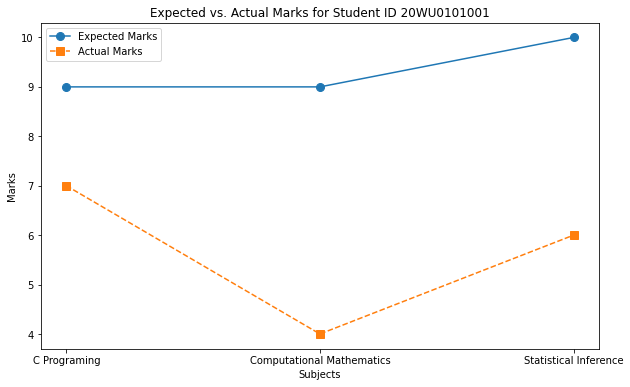

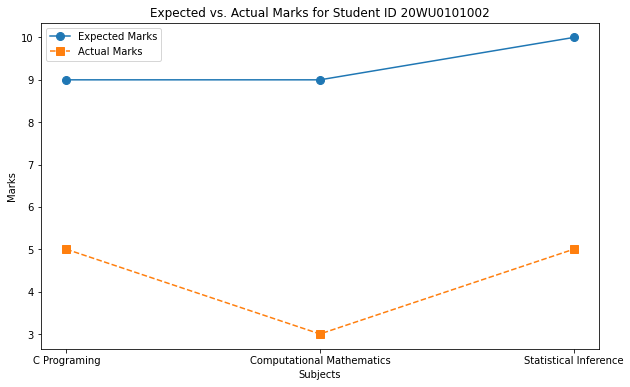

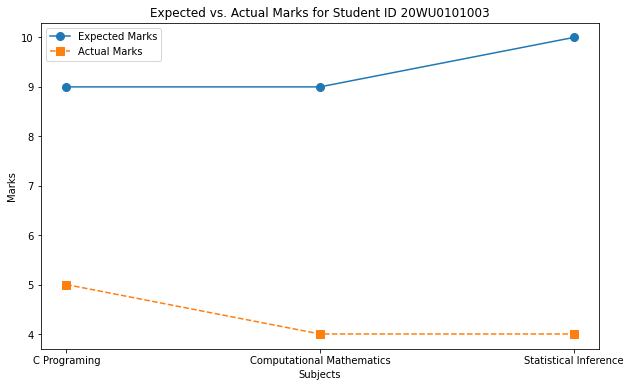

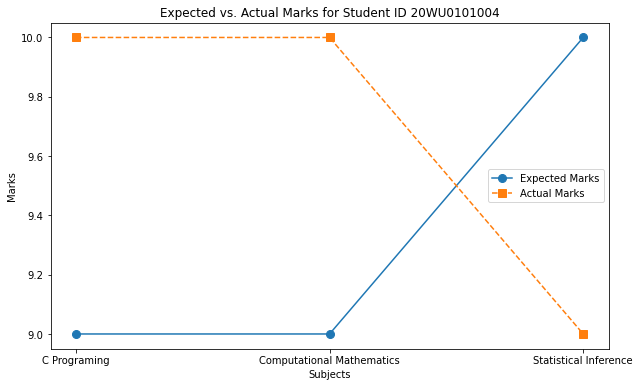

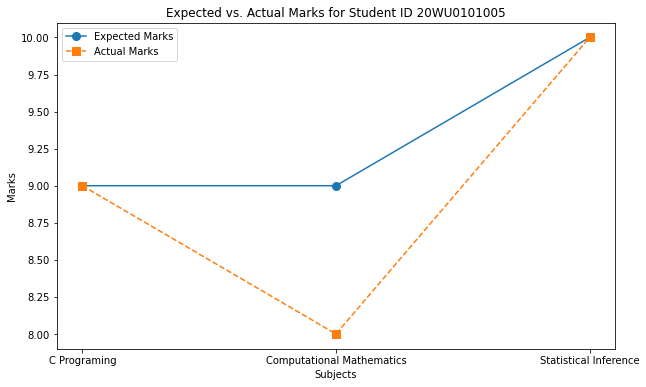

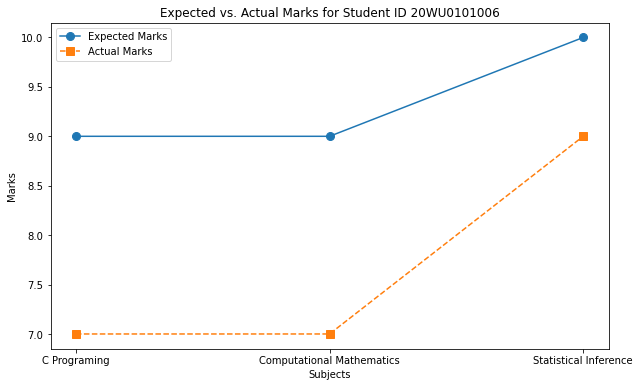

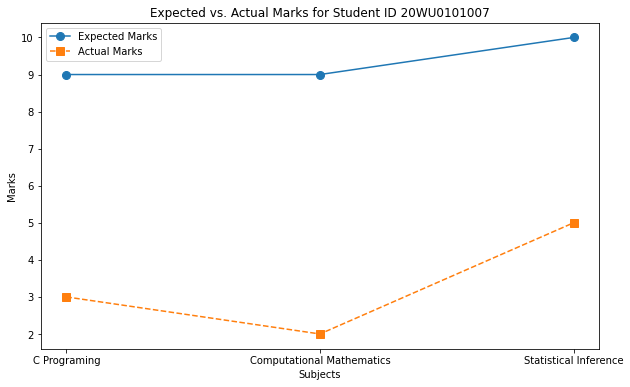

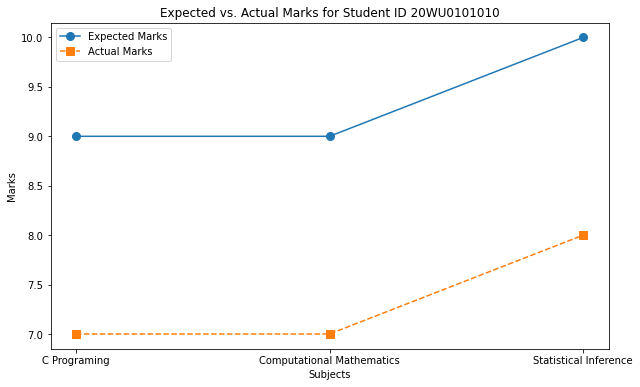

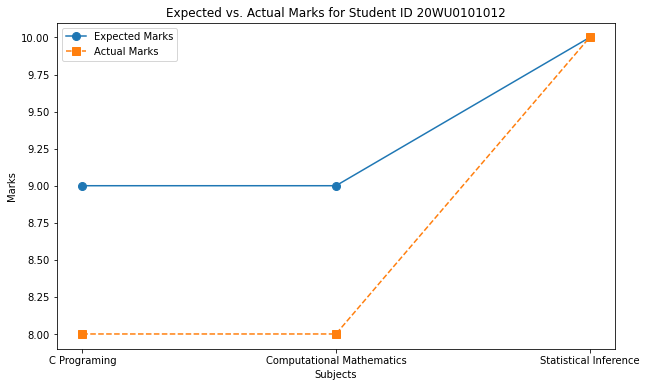

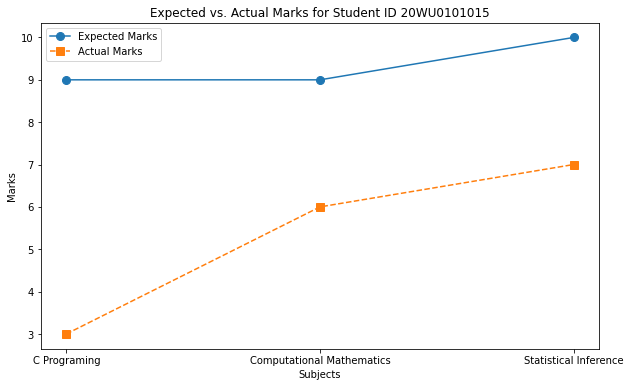

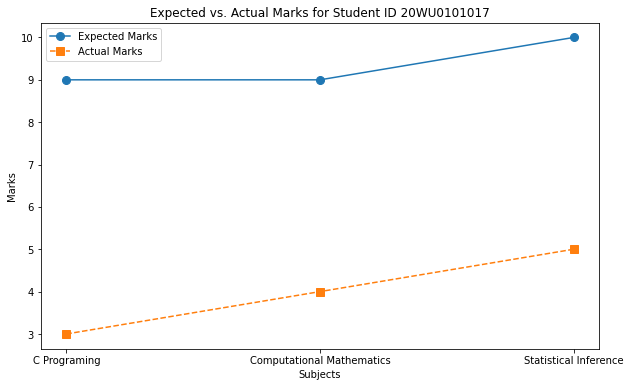

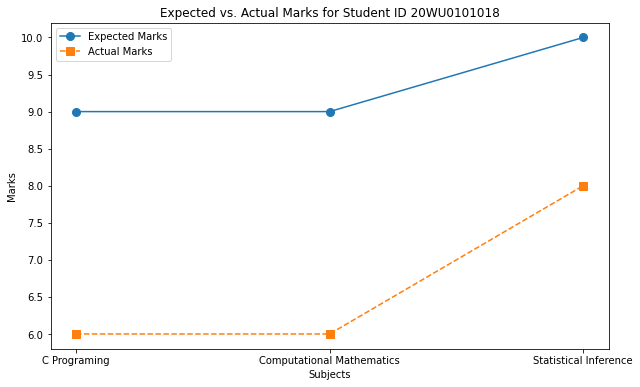

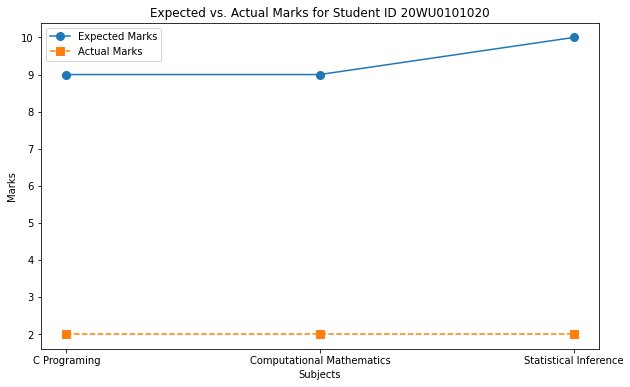

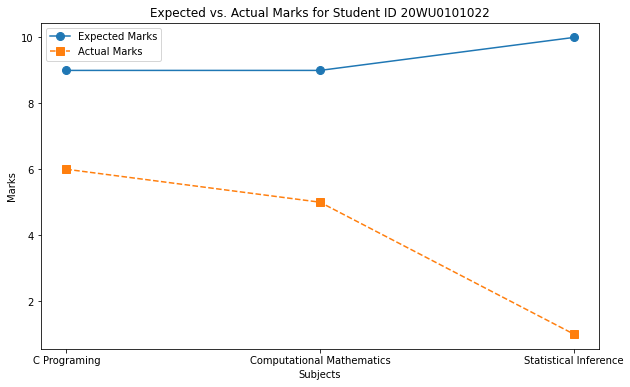

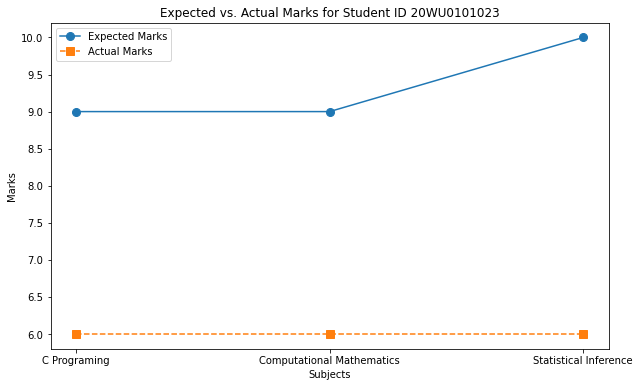

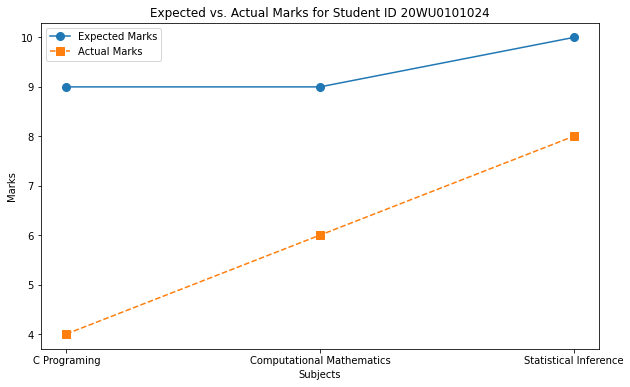

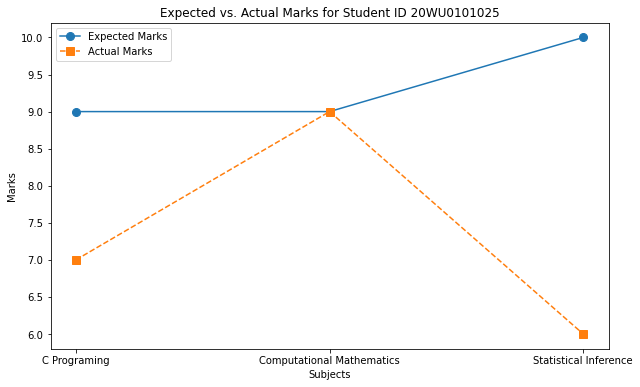

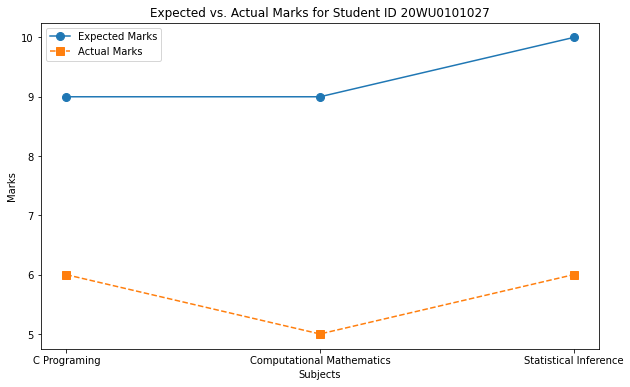

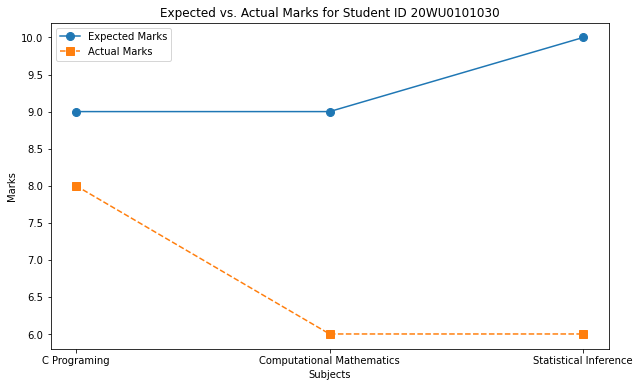

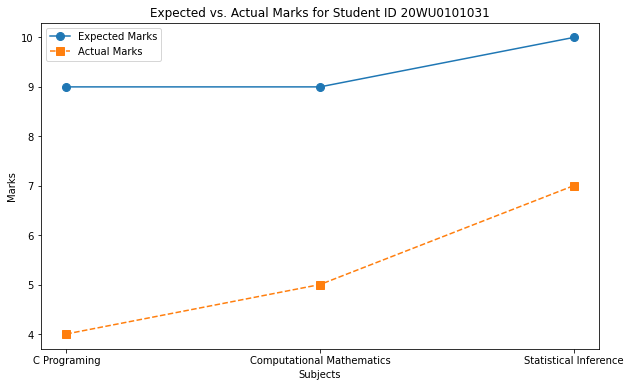

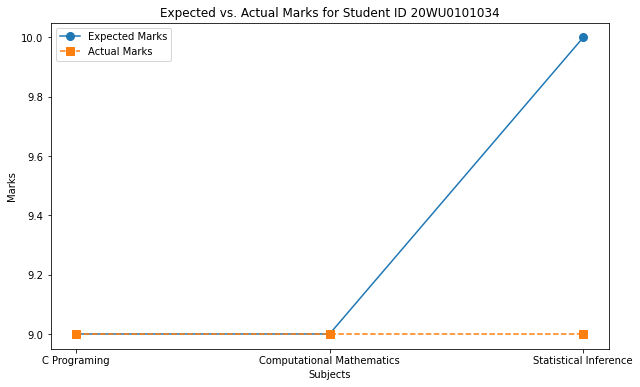

In [38]:
import matplotlib.pyplot as plt

subjects_to_plot = ['C Programing', 'Computational Mathematics', 'Statistical Inference']

unique_student_ids = Required_subjects['STUDENTID'].unique()

# Loop through each student and create a separate graph
for student_id in unique_student_ids:
    # Check if there are rows that match the student_id
    if any(Required_subjects['STUDENTID'] == student_id):
        expected_marks = [expected_weights[subject] for subject in subjects_to_plot]
        actual_marks = [Required_subjects.loc[Required_subjects['STUDENTID'] == student_id, subject].values[0] for subject in subjects_to_plot]

        # Create a line graph
        plt.figure(figsize=(10, 6))
        plt.plot(subjects_to_plot, expected_marks, marker='o', label='Expected Marks', linestyle='-', markersize=8)
        plt.plot(subjects_to_plot, actual_marks, marker='s', label='Actual Marks', linestyle='--', markersize=8)
        plt.xlabel('Subjects')
        plt.ylabel('Marks')
        plt.title(f'Expected vs. Actual Marks for Student ID {student_id}')
        plt.legend()
        plt.show()
